Link: https://www.kaggle.com/dasmehdixtr/high-accuracy-classification-via-cross-corrleation

# Classification via Cross Correlation

Importing required libraries

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("C:\\Users\\SHASHI\\OneDrive\\Desktop\\Python\\full_data_carla.csv", index_col=0)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99358 entries, 0 to 99357
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   accelX  99358 non-null  float64
 1   accelY  99358 non-null  float64
 2   accelZ  99358 non-null  float64
 3   class   99358 non-null  object 
 4   gyroX   99358 non-null  float64
 5   gyroY   99358 non-null  float64
 6   gyroZ   99358 non-null  float64
dtypes: float64(6), object(1)
memory usage: 6.1+ MB


# Cross correlation for feature

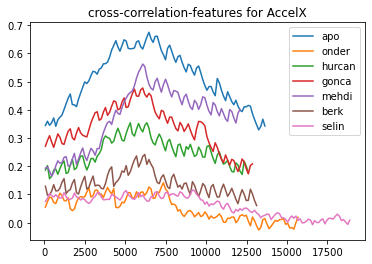

In [2]:
from scipy import signal
import matplotlib.pyplot as plt
labels = data['class'].unique()
for label in labels:
    data_label = data[data['class']==label]
    acc_label_x = data_label.iloc[:,0]
    corr = signal.correlate(acc_label_x,np.ones(len(acc_label_x)),mode='same') / len(acc_label_x)
    clock= np.arange(64, len(acc_label_x), 128)
    plt.plot(clock, corr[clock],label= label)
plt.legend()
plt.title('cross-correlation-features for AccelX')
plt.show()

## Cross correlation for all features and saved to "data_prossed"

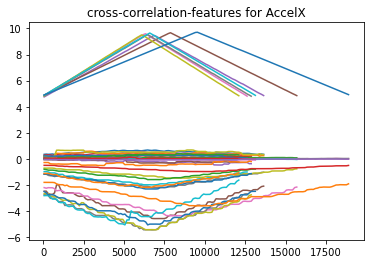

In [3]:
from scipy import signal
import matplotlib.pyplot as plt
data_featured = pd.DataFrame()
data_prossed = pd.DataFrame()
labels = data['class'].unique()

for col in np.array([0,1,2,4,5,6]):    
    for label in labels:
        data_label = data[data['class']==label]
        acc_label_x = data_label.iloc[:,col]
        corr = signal.correlate(acc_label_x,np.ones(len(acc_label_x)),mode='same') / len(acc_label_x)
        data_featured=pd.concat([data_featured,pd.DataFrame(corr)], ignore_index=True)
        clock= np.arange(64, len(acc_label_x), 128)
        plt.plot(clock, corr[clock],label= label)
    data_prossed = pd.concat([data_prossed,data_featured],axis=1,ignore_index=True)
    data_featured = pd.DataFrame()
#plt.legend()
plt.title('cross-correlation-features for AccelX')
plt.show()

In [4]:
data_prossed

,0,1,2,3,4,5
0,0.335816,-1.178194,4.705044,0.201233,0.194161,-2.479797
1,0.335968,-1.178154,4.705750,0.201219,0.194089,-2.479784
2,0.336122,-1.178118,4.706456,0.201206,0.194013,-2.479773
3,0.336269,-1.178084,4.707161,0.201194,0.193934,-2.479765
4,0.336412,-1.178287,4.707869,0.201186,0.193683,-2.479995
...,...,...,...,...,...,...
99353,0.013872,-0.487521,4.873885,0.025477,-0.028620,-1.841336
99354,0.013963,-0.487154,4.873371,0.025390,-0.028386,-1.840768
99355,0.014052,-0.486855,4.872858,0.025273,-0.028073,-1.839946
99356,0.014130,-0.486611,4.872345,0.025148,-0.027737,-1.838944


In [5]:
# Train_test_split, creating X & Y axis data.
data_prossed['class'] = data['class']
x = data_prossed.drop(["class"],axis=1)
y = data_prossed["class"].values

In [6]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True)

In [7]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train,y_train)
print('acc_of_sgd is: ', sgd.score(X_test,y_test))

acc_of_sgd is:  0.7093800322061191


In [8]:
nb = GaussianNB()
nb.fit(X_train,y_train)
print('accuracy of bayes in test data is :', nb.score(X_test,y_test))

accuracy of bayes in test data is : 0.6314814814814815


In [9]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
print('acc_knn: ',knn.score(X_test,y_test))

acc_knn:  0.9997987117552335


In [ ]:
svm = SVC(random_state = 1)
svm.fit(X_train,y_train)
print("SVM accuracy is :",svm.score(X_test,y_test))